## Практическая работа

## Цели практической работы

*  решить реальную задачу;
*  потренироваться в обработке данных;
*  обучить различные модели классификации, подобрать гиперпараметры и выбрать лучшую модель;
*  добиться наилучшего качества в задаче.

## Что входит в практическую работу

*  исследование датасета и обработка данных (работа с пропущенными и ошибочными значениями);
*  обучение различных моделей классификации с параметрами по умолчанию;
*  подбор гиперпараметров моделей;
*  смешивание моделей;
*  оценка качества моделей.

## Что оценивается

*  Выполнены все этапы задания: код запускается, отрабатывает без ошибок; подробно и обоснованно написаны текстовые выводы, где это требуется.

## Формат сдачи
Выполните предложенные задания: впишите свой код (или, если требуется, текст) в ячейки после комментариев. 

*Комментарии — это текст, который начинается с символа #. Например: # ваш код здесь.*

Сохраните изменения, используя опцию Save and Checkpoint из вкладки меню File или кнопку Save and Checkpoint на панели инструментов. Итоговый файл в формате .ipynb (файл Jupyter Notebook) загрузите в личный кабинет и отправьте на проверку.

### 1. Загрузите тренировочные и тестовые датасеты

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from category_encoders import TargetEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")

train_data = pd.read_csv("TrainData.csv")
test_data = pd.read_csv("TestData.csv")

### 2. Изучите тренировочные и тестовые данные на наличие:
- пропусков,
- ошибочных значений.

Обработайте пропуски и ошибочные значения способом, выбранным по своему усмотрению.

In [2]:
# Ваш код здесь
train_data

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,target
0,50,218.593930,273536,0.104575,4,0.445026,0.274531,0.444334,5.970149,0.300298,0.0,0,49,0.100000,0
1,32,276.771005,173314,0.224684,11,0.445026,0.439103,0.444334,5.970149,0.300298,0.0,0,60,0.244418,0
2,38,218.593930,28887,0.032491,7,0.445026,0.274531,0.444334,25.606721,0.300298,0.0,0,50,0.244418,0
3,19,218.593930,427862,0.179322,10,0.049127,0.044987,0.009499,25.606721,0.300298,0.0,0,35,0.244418,0
4,44,218.593930,109339,0.032491,7,0.098837,0.115721,0.066581,5.970149,0.113590,0.0,0,46,0.185185,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,48,218.593930,329778,0.171817,9,0.066372,NaN,0.066581,25.606721,0.113590,0.0,0,40,0.244418,0
7496,25,218.593930,104439,0.179322,10,0.049127,0.131370,0.103024,25.606721,0.113590,0.0,0,50,0.244418,0
7497,50,218.593930,162632,0.171817,9,0.445026,0.482222,0.444334,25.606721,0.300298,0.0,0,45,0.244418,0
7498,51,276.771005,174824,0.171817,9,0.049127,0.093897,0.103024,25.606721,0.300298,8614.0,0,40,0.244418,1


In [3]:
train_data.describe()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,target
count,7500.000000,7425.000000,7.500000e+03,7500.000000,7500.000000,7500.000000,5625.000000,7500.000000,7500.000000,7500.000000,7490.000000,7500.000000,7500.000000,7500.000000,7500.000000
mean,38.579600,238.905308,1.903850e+05,0.238933,10.083200,0.238934,0.240556,0.238933,23.893333,0.238933,1068.693992,88.974933,40.670800,0.238955,0.238933
std,13.647719,76.198282,1.058674e+05,0.151738,2.546071,0.190283,0.147371,0.193365,4.451530,0.087708,7430.344770,404.517032,12.330051,0.041685,0.426460
min,17.000000,64.259070,1.930200e+04,0.000029,1.000000,0.049127,0.000000,0.009499,5.970149,0.113590,0.000000,0.000000,1.000000,0.000080,0.000000
25%,28.000000,218.593930,1.180190e+05,0.171817,9.000000,0.049127,0.115721,0.066581,25.606721,0.113590,0.000000,0.000000,40.000000,0.244418,0.000000
50%,37.000000,218.593930,1.795685e+05,0.179322,10.000000,0.098837,0.241573,0.103024,25.606721,0.300298,0.000000,0.000000,40.000000,0.244418,0.000000
75%,47.000000,218.593930,2.394418e+05,0.239316,12.000000,0.445026,0.439103,0.444334,25.606721,0.300298,0.000000,0.000000,45.000000,0.244418,0.000000
max,90.000000,575.396825,1.226583e+06,0.729323,16.000000,0.445026,0.482222,0.484375,25.606721,0.300298,99999.000000,4356.000000,99.000000,0.466666,1.000000


In [4]:
train_data.isna().sum()

f1           0
f2          75
f3           0
f4           0
f5           0
f6           0
f7        1875
f8           0
f9           0
f10          0
f11         10
f12          0
f13          0
f14          0
target       0
dtype: int64

In [5]:
def fill_missing_values_optimized(df, target_column, col1, col2, col3):

    df_copy = df.copy()

    missing_rows = df_copy[target_column].isnull()

    mode_dict = {}
    for i in range(df_copy.shape[0]):
        if not missing_rows[i] and not pd.isna(df_copy.loc[i, col1]) and not pd.isna(df_copy.loc[i, col2]) and not pd.isna(df_copy.loc[i, col3]):
            key = (df_copy.loc[i, col1], df_copy.loc[i, col2], df_copy.loc[i, col3])
            if key not in mode_dict:
                matching_rows = df_copy.loc[(df_copy[col1] == df_copy.loc[i, col1]) &
                                            (df_copy[col2] == df_copy.loc[i, col2]) &
                                            (df_copy[col3] == df_copy.loc[i, col3])]
                mode_dict[key] = matching_rows[target_column].mode()


    for i in range(df_copy.shape[0]):
                if missing_rows[i] and not pd.isna(df_copy.loc[i, col1]) and not pd.isna(df_copy.loc[i, col2]) and not pd.isna(df_copy.loc[i, col3]):
                    key = (df_copy.loc[i, col1], df_copy.loc[i, col2], df_copy.loc[i, col3])
                    mode = mode_dict.get(key)
                    if mode is not None and len(mode) > 0:
                        df_copy.loc[i, target_column] = mode[0]

    return df_copy

In [6]:
df_train = train_data.copy()

In [7]:
df_train = fill_missing_values_optimized(df_train, 'f2', 'f1', 'f3', 'f4')

In [8]:
df_train = fill_missing_values_optimized(df_train, 'f7', 'f6', 'f8', 'f9')

In [9]:
df_train = fill_missing_values_optimized(df_train, 'f11', 'f10', 'f13', 'f14')

In [10]:
df_train.isna().sum()

f1         0
f2        73
f3         0
f4         0
f5         0
f6         0
f7         4
f8         0
f9         0
f10        0
f11        0
f12        0
f13        0
f14        0
target     0
dtype: int64

In [11]:
df_train = fill_missing_values_optimized(df_train, 'f2', 'f8', 'f9', 'f10')

In [12]:
df_train = fill_missing_values_optimized(df_train, 'f7', 'f1', 'f5', 'f14')

In [13]:
df_train = fill_missing_values_optimized(df_train, 'f7', 'f6', 'f10', 'f12')

In [14]:
df_train.isna().sum()

f1        0
f2        0
f3        0
f4        0
f5        0
f6        0
f7        0
f8        0
f9        0
f10       0
f11       0
f12       0
f13       0
f14       0
target    0
dtype: int64

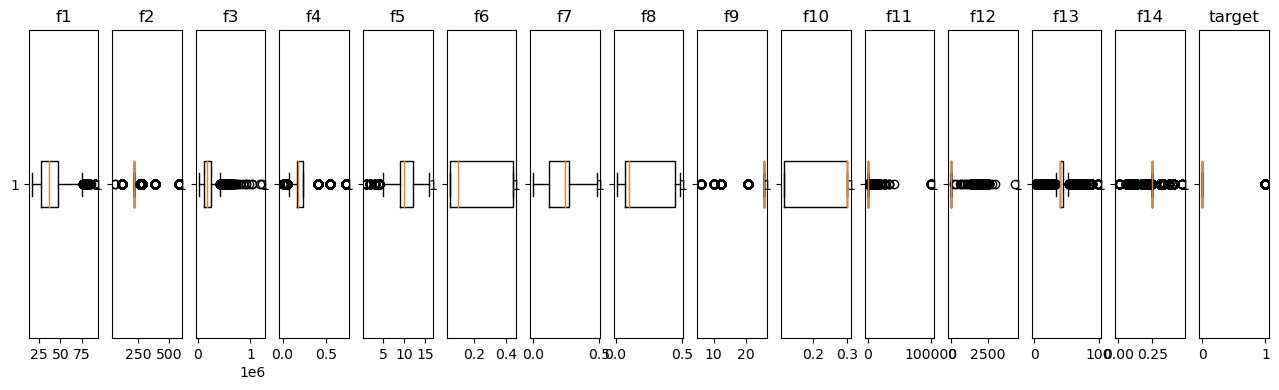

In [15]:
def boxplot_for_columns(df):
    selected_cols = df.select_dtypes(include=['int', 'float']).columns

    if len(selected_cols) > 0:
        fig, ax = plt.subplots(nrows=1, ncols=len(selected_cols), figsize=(16, 4))
        for i, col in enumerate(selected_cols):
            ax[i].boxplot(df[col], vert=False)
            ax[i].set_title(col)
        plt.show()
    else:
        print("Во фрейме данных не найдено числовых столбцов")

boxplot_for_columns(df_train)

In [16]:
def remove_outliers(df):
    num_cols = df.drop('target', axis=1)
    for col in num_cols:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

df_train = remove_outliers(df_train)

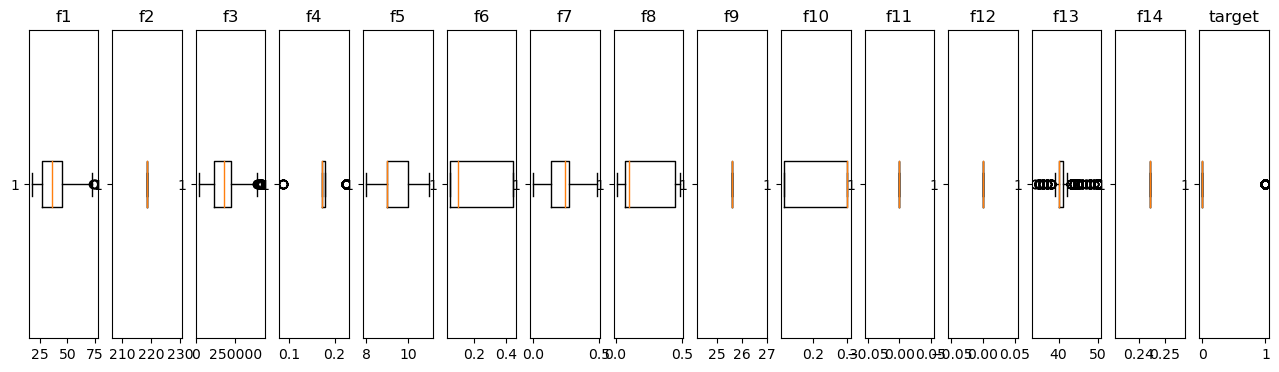

In [17]:
boxplot_for_columns(df_train)

In [18]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1667 entries, 5 to 7497
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      1667 non-null   int64  
 1   f2      1667 non-null   float64
 2   f3      1667 non-null   int64  
 3   f4      1667 non-null   float64
 4   f5      1667 non-null   int64  
 5   f6      1667 non-null   float64
 6   f7      1667 non-null   float64
 7   f8      1667 non-null   float64
 8   f9      1667 non-null   float64
 9   f10     1667 non-null   float64
 10  f11     1667 non-null   float64
 11  f12     1667 non-null   int64  
 12  f13     1667 non-null   int64  
 13  f14     1667 non-null   float64
 14  target  1667 non-null   int64  
dtypes: float64(9), int64(6)
memory usage: 208.4 KB


Дубликатов очень много, но их удалять мы не будет. На данный момент мы разабрались с пропусками и выбросами на тренеровочном датафрейме, сделаем тоже самое и для тестового

In [19]:
test_data

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,target
0,31,238.933333,47296,0.238933,10,0.238933,0.238933,0.238933,23.893333,0.238933,0,1740,20,0.238933,0
1,24,238.933333,33088,0.238933,7,0.238933,0.238933,0.238933,23.893333,0.238933,0,0,40,0.238933,0
2,18,238.933333,283342,0.238933,7,0.238933,0.238933,0.238933,23.893333,0.238933,0,0,20,0.238933,0
3,19,238.933333,393712,0.238933,9,0.238933,0.238933,0.238933,23.893333,0.238933,0,0,20,0.238933,0
4,28,238.933333,200515,0.238933,10,0.238933,0.238933,0.238933,23.893333,0.238933,0,0,40,0.238933,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,40,238.933333,220589,0.238933,10,0.238933,0.238933,0.238933,23.893333,0.238933,0,0,40,0.238933,1
2496,54,238.933333,165278,0.238933,10,0.238933,0.238933,0.238933,23.893333,0.238933,0,0,40,0.238933,1
2497,44,238.933333,398473,0.238933,10,0.238933,0.238933,0.238933,23.893333,0.238933,0,0,70,0.238933,1
2498,35,238.933333,183898,0.238933,11,0.238933,0.238933,0.238933,23.893333,0.238933,7298,0,50,0.238933,1


In [20]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      2500 non-null   int64  
 1   f2      2500 non-null   float64
 2   f3      2500 non-null   int64  
 3   f4      2500 non-null   float64
 4   f5      2500 non-null   int64  
 5   f6      2500 non-null   float64
 6   f7      2500 non-null   float64
 7   f8      2500 non-null   float64
 8   f9      2500 non-null   float64
 9   f10     2500 non-null   float64
 10  f11     2500 non-null   int64  
 11  f12     2500 non-null   int64  
 12  f13     2500 non-null   int64  
 13  f14     2500 non-null   float64
 14  target  2500 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 293.1 KB


In [21]:
test_data.describe()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,target
count,2500.000000,2.500000e+03,2500.000000,2.500000e+03,2500.000000,2.500000e+03,2.500000e+03,2.500000e+03,2.500000e+03,2.500000e+03,2500.000000,2500.00000,2500.000000,2.500000e+03,2500.000000
mean,38.069200,2.389333e+02,191561.425200,2.389333e-01,10.056800,2.389333e-01,2.389333e-01,2.389333e-01,2.389333e+01,2.389333e-01,1022.667200,83.76080,40.108800,2.389333e-01,0.234800
std,13.442168,5.912898e-12,107542.508483,1.424146e-14,2.554875,1.424146e-14,1.424146e-14,1.424146e-14,9.594246e-14,1.424146e-14,6786.871929,387.72358,12.109914,1.424146e-14,0.423959
min,17.000000,2.389333e+02,19302.000000,2.389333e-01,1.000000,2.389333e-01,2.389333e-01,2.389333e-01,2.389333e+01,2.389333e-01,0.000000,0.00000,3.000000,2.389333e-01,0.000000
25%,27.000000,2.389333e+02,119098.750000,2.389333e-01,9.000000,2.389333e-01,2.389333e-01,2.389333e-01,2.389333e+01,2.389333e-01,0.000000,0.00000,38.750000,2.389333e-01,0.000000
50%,37.000000,2.389333e+02,177510.500000,2.389333e-01,10.000000,2.389333e-01,2.389333e-01,2.389333e-01,2.389333e+01,2.389333e-01,0.000000,0.00000,40.000000,2.389333e-01,0.000000
75%,47.000000,2.389333e+02,238851.250000,2.389333e-01,12.000000,2.389333e-01,2.389333e-01,2.389333e-01,2.389333e+01,2.389333e-01,0.000000,0.00000,45.000000,2.389333e-01,0.000000
max,90.000000,2.389333e+02,910398.000000,2.389333e-01,16.000000,2.389333e-01,2.389333e-01,2.389333e-01,2.389333e+01,2.389333e-01,99999.000000,2559.00000,99.000000,2.389333e-01,1.000000


In [22]:
test_data.isna().sum()

f1        0
f2        0
f3        0
f4        0
f5        0
f6        0
f7        0
f8        0
f9        0
f10       0
f11       0
f12       0
f13       0
f14       0
target    0
dtype: int64

In [23]:
df_test = test_data.copy()

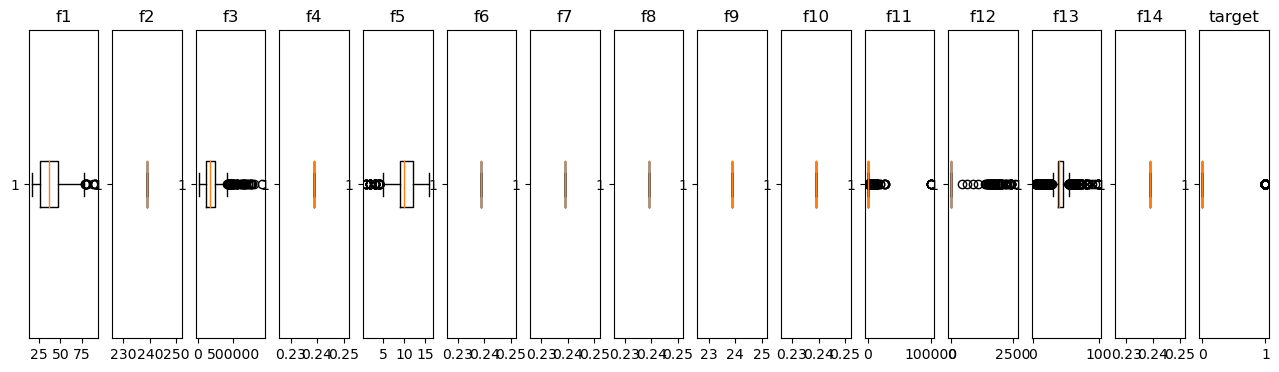

In [24]:
boxplot_for_columns(df_test)

In [25]:
df_test = remove_outliers(df_test)

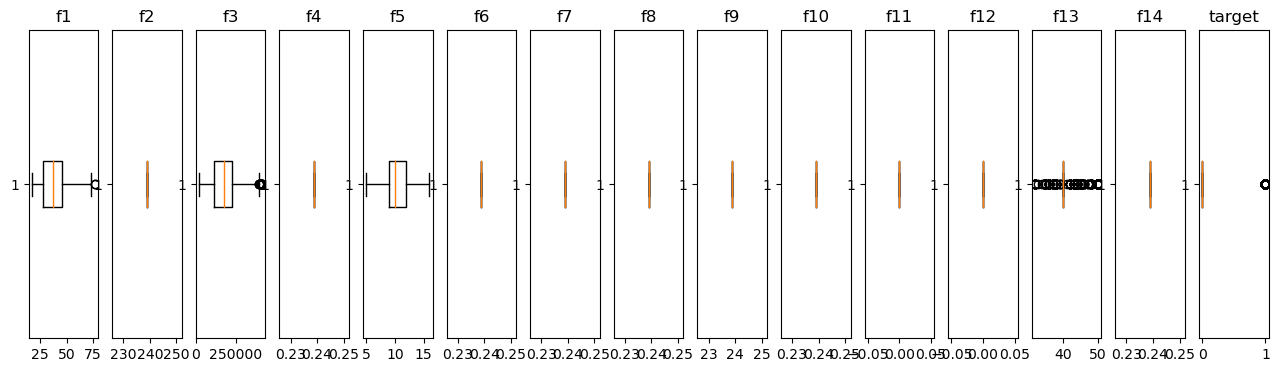

In [26]:
boxplot_for_columns(df_test)

Как мы видим пропущенных значении нет. С выбросами мы поработали. Если модель будет слишком плошими мы сможем удалить выбросы отдельно потому что работаем с копиями данных

### 3. Оцените баланс классов в задаче
- Затем попытайтесь устно ответить на вопрос, можно ли использовать accuracy как метрику качества в задаче? 

In [27]:
# Ваш код здесь
df_train['target'].value_counts()

target
0    1371
1     296
Name: count, dtype: int64

In [28]:
df_test['target'].value_counts()

target
0    1148
1     302
Name: count, dtype: int64

Accuracy (точность) будет считать долю правильных предсказаний относительно общего числа наблюдений. По этому мы можем точно сказать что аccuracy это плохая метрика для данной задачи, потому что даже если модель предскажет все нули, то аccuracy будет равен 82%

### 3. Постройте baseline-модель:
- разбейте TrainData на тренировочные (Train) и тестовые данные (Test); 
- обучите KNN, LogisticRegression и SVC с параметрами по умолчанию на тренировочных данных (Train);
- примените модели на тестовых данных (Test) и вычислите значение метрики f1.

In [29]:
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

# Ваш код здесь
X = df_train.drop(['target'], axis=1)
y = df_train['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [30]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [31]:
knn = KNeighborsClassifier()
logreg = LogisticRegression()
svc = SVC(probability=True)

knn.fit(X_train, y_train)
logreg.fit(X_train, y_train)
svc.fit(X_train, y_train)

SVC(probability=True)

In [32]:
knn_pred = knn.predict(X_test)
logreg_pred = logreg.predict(X_test)
svc_pred = svc.predict(X_test)

In [33]:
selected_threshold = 0.5 

proba_predictions_knn = knn.predict_proba(X_test)[:, 1]
proba_predictions_logreg = logreg.predict_proba(X_test)[:, 1]
proba_predictions_svc = svc.predict_proba(X_test)[:, 1]


binary_predictions_knn = (proba_predictions_knn >= selected_threshold).astype(int)
binary_predictions_logreg = (proba_predictions_logreg >= selected_threshold).astype(int)
binary_predictions_svc = (proba_predictions_svc >= selected_threshold).astype(int)


f1_knn = f1_score(y_test, binary_predictions_knn)
f1_logreg = f1_score(y_test, binary_predictions_logreg)
f1_svc = f1_score(y_test, binary_predictions_svc)


print(f"F1-score KNN: {f1_knn}")
print(f"F1-score  LogisticRegression: {f1_logreg}")
print(f"F1-score SVC: {f1_svc}")

F1-score KNN: 0.3648648648648649
F1-score  LogisticRegression: 0.28346456692913385
F1-score SVC: 0.22608695652173913


### 4. Улучшите модели
Попробуйте улучшить качество обученных моделей:
- можете подбирать гиперпараметры моделей (лучше это делать по кросс-валидации на Train, то есть с помощью использования GridSearchCV на Train);
- можете задавать class_weights;
- можете вручную или при помощи методов Python генерировать новые признаки и/или удалять существующие.

Это самая важная и творческая часть задания. Проводите как можно больше экспериментов!

Проведите минимиум три эксперимента: для каждого типа модели минимум один эксперимент.

In [34]:
# Ваш код здесь
from sklearn.model_selection import GridSearchCV

# 1. KNN
knn_params = {'n_neighbors': [3, 5, 7, 10, 15], 'weights': ['uniform', 'distance'], 'p': [1, 2]}
knn_grid = GridSearchCV(KNeighborsClassifier(), knn_params, scoring='f1', cv=5)
knn_grid.fit(X_train, y_train)

# 2. Logistic Regression
logreg_params = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}
logreg_grid = GridSearchCV(LogisticRegression(), logreg_params, scoring='f1', cv=5)
logreg_grid.fit(X_train, y_train)

# 3. Support Vector Classifier (SVC)
svc_params = {'C': [0.1, 1, 10, 100, 1000], 'kernel': ['linear', 'rbf'], 'gamma': ['scale', 'auto'], 'class_weight': [None, 'balanced']}
svc_grid = GridSearchCV(SVC(probability=True), svc_params, scoring='f1', cv=5)
svc_grid.fit(X_train, y_train)

# Выводим наилучшие параметры для каждой модели
print("Best Params KNN:", knn_grid.best_params_)
print("Best Params Logistic Regression:", logreg_grid.best_params_)
print("Best Params SVC:", svc_grid.best_params_)

# Предсказываем вероятности на тестовой выборке
proba_predictions_knn = knn_grid.predict_proba(X_test)[:, 1]
proba_predictions_logreg = logreg_grid.predict_proba(X_test)[:, 1]
proba_predictions_svc = svc_grid.predict_proba(X_test)[:, 1]

# Находим оптимальный порог для каждой модели (как ранее)
# Здесь нужно подставить вместо selected_threshold полученные пороги в результате GridSearchCV

# Применяем порог к вероятностям на тестовой выборке
binary_predictions_knn = (proba_predictions_knn >= selected_threshold).astype(int)
binary_predictions_logreg = (proba_predictions_logreg >= selected_threshold).astype(int)
binary_predictions_svc = (proba_predictions_svc >= selected_threshold).astype(int)

# Вычисляем F1-score для каждой модели
f1_knn = f1_score(y_test, binary_predictions_knn)
f1_logreg = f1_score(y_test, binary_predictions_logreg)
f1_svc = f1_score(y_test, binary_predictions_svc)

# Выводим значения F1-score для каждой модели
print(f"F1-score KNN: {f1_knn}")
print(f"F1-score Logistic Regression: {f1_logreg}")
print(f"F1-score SVC: {f1_svc}")


Best Params KNN: {'n_neighbors': 7, 'p': 2, 'weights': 'uniform'}
Best Params Logistic Regression: {'C': 10, 'penalty': 'l2'}
Best Params SVC: {'C': 1, 'class_weight': 'balanced', 'gamma': 'scale', 'kernel': 'rbf'}
F1-score KNN: 0.3472222222222222
F1-score Logistic Regression: 0.28346456692913385
F1-score SVC: 0.039603960396039604


### 5. Оцените на отложенной выборке качество наилучшей модели
В пунктах 3 и 4 вы построили много разных моделей.

Возьмите ту, которая дала наилучшее качество на тестовых данных (Test). Примените её на отложенной выборке (TestData) и выведите на экран значение метрики f1.

In [48]:
# Ваш код здесь
x = df_test.drop('target', axis=1)
y = df_test['target']

x = scaler.transform(x)

knn_proba = KNeighborsClassifier(n_neighbors=7, p=2, weights='uniform')
knn_proba.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [50]:
# Применяем лучшую модель
proba_predictions_best_model = knn_proba.predict_proba(x)[:, 1]

# Применяем порог к вероятностям на отложенной выборке
binary_predictions_best_model = (proba_predictions_best_model >= selected_threshold).astype(int)

# Вычисляем F1-score для лучшей модели
f1_best_model = f1_score(y, binary_predictions_best_model)

# Выводим значение F1-score для лучшей модели
print(f"F1-score на отложенной выборке для лучшей модели: {f1_best_model}")


F1-score на отложенной выборке для лучшей модели: 0.0


In [52]:
from sklearn.metrics import confusion_matrix

y_pred = knn_proba.predict(x)
print(confusion_matrix(y, y_pred))

[[1145    3]
 [ 302    0]]


### 6. Выполните хитрый трюк
Часто смешивание различных моделей даёт улучшение итогового предсказания. Попробуйте смешать две лучшие модели по формуле:
$$pred_{final} = \alpha\cdot pred_1 + (1-\alpha)\cdot pred_2$$.

Значение $\alpha$ подберите в цикле по Test-выборке. Оцените качество на отложенной выборке.

Удалось ли добиться улучшения качества?

In [60]:
X_df_train = df_train.drop('target', axis=1)
y_df_train = df_train['target']

X_df_train = scaler.fit_transform(X_df_train)

knn_model =  KNeighborsClassifier(n_neighbors=7, p=2, weights='uniform')
knn_model.fit(X_df_train, y_df_train)

logreg_model = LogisticRegression(C=10, penalty='l2')
logreg_model.fit(X_df_train, y_df_train)

proba_predictions_knn = knn_model.predict_proba(x)[:, 1]
proba_predictions_logreg = logreg_model.predict_proba(x)[:, 1]

In [61]:
# Ваш код здесь
alphas = np.arange(0, 1.01, 0.01)
best_f1 = 0
best_alpha = 0

for alpha in alphas:
    # Смешиваем предсказания двух лучших моделей с использованием формулы
    blended_predictions = alpha * proba_predictions_knn + (1 - alpha) * proba_predictions_logreg

    # Находим оптимальный порог для смешанных предсказаний (может потребоваться отдельная настройка порога)
    blended_binary_predictions = (blended_predictions >= selected_threshold).astype(int)

    # Вычисляем F1-score
    f1_blended = f1_score(y, blended_binary_predictions)

    # Обновляем лучшие значения
    if f1_blended > best_f1:
        best_f1 = f1_blended
        best_alpha = alpha

# Выводим лучшие параметры и результат
print(f"Лучший F1-score: {best_f1} достигнут при alpha = {best_alpha}")


Лучший F1-score: 0.09968847352024922 достигнут при alpha = 0.0


In [64]:
y_pred = knn_model.predict(x)
print(confusion_matrix(y, y_pred))

[[1141    7]
 [ 302    0]]


Где то мы допустили ошибку. Давайте проверим и доработаем

Скорее всего мы работали с выбросами не правильно, применим другой подход

In [79]:
df_train_1 = train_data.copy()

In [80]:
df_train_1 = fill_missing_values_optimized(df_train_1, 'f2', 'f1', 'f3', 'f4')
df_train_1 = fill_missing_values_optimized(df_train_1, 'f7', 'f6', 'f8', 'f9')
df_train_1 = fill_missing_values_optimized(df_train_1, 'f11', 'f10', 'f13', 'f14')
df_train_1 = fill_missing_values_optimized(df_train_1, 'f2', 'f8', 'f9', 'f10')
df_train_1 = fill_missing_values_optimized(df_train_1, 'f7', 'f1', 'f5', 'f14')
df_train_1 = fill_missing_values_optimized(df_train_1, 'f7', 'f6', 'f10', 'f12')
df_train_1.isna().sum()

f1        0
f2        0
f3        0
f4        0
f5        0
f6        0
f7        0
f8        0
f9        0
f10       0
f11       0
f12       0
f13       0
f14       0
target    0
dtype: int64

In [81]:
df_train_1.describe()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,target
count,7500.000000,7500.000000,7.500000e+03,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000
mean,38.579600,238.708207,1.903850e+05,0.238933,10.083200,0.238934,0.232285,0.238933,23.893333,0.238933,1067.269067,88.974933,40.670800,0.238955,0.238933
std,13.647719,75.843409,1.058674e+05,0.151738,2.546071,0.190283,0.142141,0.193365,4.451530,0.087708,7425.491311,404.517032,12.330051,0.041685,0.426460
min,17.000000,64.259070,1.930200e+04,0.000029,1.000000,0.049127,0.000000,0.009499,5.970149,0.113590,0.000000,0.000000,1.000000,0.000080,0.000000
25%,28.000000,218.593930,1.180190e+05,0.171817,9.000000,0.049127,0.115721,0.066581,25.606721,0.113590,0.000000,0.000000,40.000000,0.244418,0.000000
50%,37.000000,218.593930,1.795685e+05,0.179322,10.000000,0.098837,0.241573,0.103024,25.606721,0.300298,0.000000,0.000000,40.000000,0.244418,0.000000
75%,47.000000,218.593930,2.394418e+05,0.239316,12.000000,0.445026,0.274531,0.444334,25.606721,0.300298,0.000000,0.000000,45.000000,0.244418,0.000000
max,90.000000,575.396825,1.226583e+06,0.729323,16.000000,0.445026,0.482222,0.484375,25.606721,0.300298,99999.000000,4356.000000,99.000000,0.466666,1.000000


In [83]:
df_train_1.sort_values(by='f11', ascending=False).head(50)

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,target
4560,30,218.593930,132601,0.408246,13,0.445026,0.482222,0.444334,25.606721,0.300298,99999.0,0,50,0.244418,1
4493,36,218.593930,383518,0.179322,10,0.445026,0.131370,0.484375,12.464986,0.113590,99999.0,0,40,0.244418,1
3340,37,276.771005,362062,0.729323,15,0.445026,0.241573,0.444334,25.606721,0.300298,99999.0,0,50,0.244418,1
342,53,575.396825,263925,0.171817,9,0.445026,0.241573,0.444334,25.606721,0.300298,99999.0,0,40,0.244418,1
2836,38,218.593930,167140,0.729323,15,0.445026,0.439103,0.444334,25.606721,0.300298,99999.0,0,70,0.244418,1
3013,63,218.593930,118798,0.171817,9,0.445026,0.241573,0.444334,25.606721,0.300298,99999.0,0,40,0.244418,1
6687,46,218.593930,176814,0.729323,15,0.445026,0.439103,0.444334,25.606721,0.300298,99999.0,0,50,0.244418,1
537,52,218.593930,118025,0.408246,13,0.445026,0.482222,0.444334,25.606721,0.300298,99999.0,0,50,0.244418,1
6839,46,218.593930,370119,0.729323,15,0.445026,0.439103,0.444334,25.606721,0.300298,99999.0,0,60,0.244418,1
7164,47,218.593930,168262,0.546366,14,0.066390,0.044987,0.103024,25.606721,0.300298,99999.0,0,50,0.244418,1


In [84]:
df_train_1['f11'] = df_train_1['f11'].replace(99999.0, 34095.0)

In [95]:
df_train_1[df_train_1['f12']>0].sort_values(by='f12', ascending=True)

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,target
6062,37,218.593930,262409,0.546366,14,0.098837,0.131370,0.066581,25.606721,0.113590,0.0,213,45,0.244418,0
4732,52,218.593930,122109,0.171817,9,0.049127,0.439103,0.066581,25.606721,0.113590,0.0,323,40,0.244418,0
3756,43,263.691684,118600,0.408246,13,0.098837,0.439103,0.066581,25.606721,0.113590,0.0,625,40,0.244418,0
5586,57,218.593930,34269,0.171817,9,0.066372,0.206983,0.066581,25.606721,0.300298,0.0,653,42,0.244418,1
5767,69,273.648649,159191,0.179322,10,0.066372,0.131370,0.103024,25.606721,0.113590,0.0,810,38,0.244418,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4641,37,575.396825,107164,0.072072,6,0.049127,0.206983,0.103024,25.606721,0.300298,0.0,2559,50,0.244418,1
1818,51,218.593930,153870,0.179322,10,0.445026,0.241573,0.444334,25.606721,0.300298,0.0,2603,40,0.244418,0
1237,38,276.771005,164526,0.729323,15,0.049127,0.439103,0.103024,25.606721,0.300298,0.0,2824,45,0.244418,1
4429,41,218.593930,70037,0.179322,10,0.049127,0.131370,0.066581,25.606721,0.300298,0.0,3004,60,0.307692,1


In [96]:
df_train_1['f12'] = df_train_1['f12'].replace(0, 1000)

In [97]:
df_train_1.describe()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,target
count,7500.000000,7500.000000,7.500000e+03,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000
mean,38.579600,238.708207,1.903850e+05,0.238933,10.083200,0.238934,0.232285,0.238933,23.893333,0.238933,742.142667,1041.241600,40.670800,0.238955,0.238933
std,13.647719,75.843409,1.058674e+05,0.151738,2.546071,0.190283,0.142141,0.193365,4.451530,0.087708,3481.806129,199.039265,12.330051,0.041685,0.426460
min,17.000000,64.259070,1.930200e+04,0.000029,1.000000,0.049127,0.000000,0.009499,5.970149,0.113590,0.000000,213.000000,1.000000,0.000080,0.000000
25%,28.000000,218.593930,1.180190e+05,0.171817,9.000000,0.049127,0.115721,0.066581,25.606721,0.113590,0.000000,1000.000000,40.000000,0.244418,0.000000
50%,37.000000,218.593930,1.795685e+05,0.179322,10.000000,0.098837,0.241573,0.103024,25.606721,0.300298,0.000000,1000.000000,40.000000,0.244418,0.000000
75%,47.000000,218.593930,2.394418e+05,0.239316,12.000000,0.445026,0.274531,0.444334,25.606721,0.300298,0.000000,1000.000000,45.000000,0.244418,0.000000
max,90.000000,575.396825,1.226583e+06,0.729323,16.000000,0.445026,0.482222,0.484375,25.606721,0.300298,41310.000000,4356.000000,99.000000,0.466666,1.000000


In [100]:
df_train_1[df_train_1['f11']>0].sort_values(by='f11', ascending=True)

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,target
6379,38,273.648649,354591,0.171817,9,0.049127,0.044987,0.066581,12.464986,0.113590,114.0,1000,38,0.244418,0
5928,77,276.771005,145329,0.171817,9,0.049127,0.115721,0.103024,25.606721,0.300298,401.0,1000,20,0.244418,0
876,34,263.691684,284843,0.171817,9,0.049127,0.093897,0.103024,12.464986,0.300298,594.0,1000,60,0.244418,0
2150,18,218.593930,675421,0.053571,5,0.049127,0.071672,0.009499,25.606721,0.300298,594.0,1000,40,0.244418,0
1103,20,218.593930,196745,0.179322,10,0.049127,0.044987,0.009499,25.606721,0.113590,594.0,1000,16,0.244418,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7029,44,218.593930,332401,0.729323,15,0.445026,0.241573,0.444334,25.606721,0.300298,34095.0,1000,65,0.244418,1
7101,33,218.593930,170769,0.726190,16,0.098837,0.274531,0.103024,25.606721,0.300298,34095.0,1000,60,0.244418,1
4516,46,218.593930,273771,0.408246,13,0.445026,0.274531,0.444334,25.606721,0.300298,34095.0,1000,40,0.244418,1
6839,46,218.593930,370119,0.729323,15,0.445026,0.439103,0.444334,25.606721,0.300298,34095.0,1000,60,0.244418,1


In [101]:
df_train_1['f11'] = df_train_1['f11'].replace(0, 1000)

In [103]:
df_train_1.describe()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,target
count,7500.000000,7500.000000,7.500000e+03,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000
mean,38.579600,238.708207,1.903850e+05,0.238933,10.083200,0.238934,0.232285,0.238933,23.893333,0.238933,1661.876000,1041.241600,40.670800,0.238955,0.238933
std,13.647719,75.843409,1.058674e+05,0.151738,2.546071,0.190283,0.142141,0.193365,4.451530,0.087708,3291.121231,199.039265,12.330051,0.041685,0.426460
min,17.000000,64.259070,1.930200e+04,0.000029,1.000000,0.049127,0.000000,0.009499,5.970149,0.113590,114.000000,213.000000,1.000000,0.000080,0.000000
25%,28.000000,218.593930,1.180190e+05,0.171817,9.000000,0.049127,0.115721,0.066581,25.606721,0.113590,1000.000000,1000.000000,40.000000,0.244418,0.000000
50%,37.000000,218.593930,1.795685e+05,0.179322,10.000000,0.098837,0.241573,0.103024,25.606721,0.300298,1000.000000,1000.000000,40.000000,0.244418,0.000000
75%,47.000000,218.593930,2.394418e+05,0.239316,12.000000,0.445026,0.274531,0.444334,25.606721,0.300298,1000.000000,1000.000000,45.000000,0.244418,0.000000
max,90.000000,575.396825,1.226583e+06,0.729323,16.000000,0.445026,0.482222,0.484375,25.606721,0.300298,41310.000000,4356.000000,99.000000,0.466666,1.000000


Сделаем тоже самое с тестовыми данными

In [104]:
df_test_1 = test_data.copy()

In [106]:
df_test_1.describe()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,target
count,2500.000000,2.500000e+03,2500.000000,2.500000e+03,2500.000000,2.500000e+03,2.500000e+03,2.500000e+03,2.500000e+03,2.500000e+03,2500.000000,2500.00000,2500.000000,2.500000e+03,2500.000000
mean,38.069200,2.389333e+02,191561.425200,2.389333e-01,10.056800,2.389333e-01,2.389333e-01,2.389333e-01,2.389333e+01,2.389333e-01,1022.667200,83.76080,40.108800,2.389333e-01,0.234800
std,13.442168,5.912898e-12,107542.508483,1.424146e-14,2.554875,1.424146e-14,1.424146e-14,1.424146e-14,9.594246e-14,1.424146e-14,6786.871929,387.72358,12.109914,1.424146e-14,0.423959
min,17.000000,2.389333e+02,19302.000000,2.389333e-01,1.000000,2.389333e-01,2.389333e-01,2.389333e-01,2.389333e+01,2.389333e-01,0.000000,0.00000,3.000000,2.389333e-01,0.000000
25%,27.000000,2.389333e+02,119098.750000,2.389333e-01,9.000000,2.389333e-01,2.389333e-01,2.389333e-01,2.389333e+01,2.389333e-01,0.000000,0.00000,38.750000,2.389333e-01,0.000000
50%,37.000000,2.389333e+02,177510.500000,2.389333e-01,10.000000,2.389333e-01,2.389333e-01,2.389333e-01,2.389333e+01,2.389333e-01,0.000000,0.00000,40.000000,2.389333e-01,0.000000
75%,47.000000,2.389333e+02,238851.250000,2.389333e-01,12.000000,2.389333e-01,2.389333e-01,2.389333e-01,2.389333e+01,2.389333e-01,0.000000,0.00000,45.000000,2.389333e-01,0.000000
max,90.000000,2.389333e+02,910398.000000,2.389333e-01,16.000000,2.389333e-01,2.389333e-01,2.389333e-01,2.389333e+01,2.389333e-01,99999.000000,2559.00000,99.000000,2.389333e-01,1.000000


In [107]:
df_test_1['f11'] = df_test_1['f11'].replace(99999.0, 34095.0)
df_test_1['f12'] = df_test_1['f12'].replace(0, 1000)
df_test_1['f11'] = df_test_1['f11'].replace(0, 1000)

df_test_1.describe()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,target
count,2500.000000,2.500000e+03,2500.000000,2.500000e+03,2500.000000,2.500000e+03,2.500000e+03,2.500000e+03,2.500000e+03,2.500000e+03,2500.000000,2500.000000,2500.000000,2.500000e+03,2500.000000
mean,38.069200,2.389333e+02,191561.425200,2.389333e-01,10.056800,2.389333e-01,2.389333e-01,2.389333e-01,2.389333e+01,2.389333e-01,1670.251200,1037.760800,40.108800,2.389333e-01,0.234800
std,13.442168,5.912898e-12,107542.508483,1.424146e-14,2.554875,1.424146e-14,1.424146e-14,1.424146e-14,9.594246e-14,1.424146e-14,3140.881597,185.341784,12.109914,1.424146e-14,0.423959
min,17.000000,2.389333e+02,19302.000000,2.389333e-01,1.000000,2.389333e-01,2.389333e-01,2.389333e-01,2.389333e+01,2.389333e-01,114.000000,419.000000,3.000000,2.389333e-01,0.000000
25%,27.000000,2.389333e+02,119098.750000,2.389333e-01,9.000000,2.389333e-01,2.389333e-01,2.389333e-01,2.389333e+01,2.389333e-01,1000.000000,1000.000000,38.750000,2.389333e-01,0.000000
50%,37.000000,2.389333e+02,177510.500000,2.389333e-01,10.000000,2.389333e-01,2.389333e-01,2.389333e-01,2.389333e+01,2.389333e-01,1000.000000,1000.000000,40.000000,2.389333e-01,0.000000
75%,47.000000,2.389333e+02,238851.250000,2.389333e-01,12.000000,2.389333e-01,2.389333e-01,2.389333e-01,2.389333e+01,2.389333e-01,1000.000000,1000.000000,45.000000,2.389333e-01,0.000000
max,90.000000,2.389333e+02,910398.000000,2.389333e-01,16.000000,2.389333e-01,2.389333e-01,2.389333e-01,2.389333e+01,2.389333e-01,34095.000000,2559.000000,99.000000,2.389333e-01,1.000000


Начнем готовить модель

In [108]:
X = df_train_1.drop(['target'], axis=1)
y = df_train_1['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Применим GridSearchCV

In [109]:
# 1. KNN
knn_params = {'n_neighbors': [3, 5, 7, 10, 15], 'weights': ['uniform', 'distance'], 'p': [1, 2]}
knn_grid = GridSearchCV(KNeighborsClassifier(), knn_params, scoring='f1', cv=5)
knn_grid.fit(X_train, y_train)

# 2. Logistic Regression
logreg_params = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}
logreg_grid = GridSearchCV(LogisticRegression(), logreg_params, scoring='f1', cv=5)
logreg_grid.fit(X_train, y_train)

# 3. Support Vector Classifier (SVC)
svc_params = {'C': [0.1, 1, 10, 100, 1000], 'kernel': ['linear', 'rbf'], 'gamma': ['scale', 'auto'], 'class_weight': [None, 'balanced']}
svc_grid = GridSearchCV(SVC(probability=True), svc_params, scoring='f1', cv=5)
svc_grid.fit(X_train, y_train)

# Выводим наилучшие параметры для каждой модели
print("Best Params KNN:", knn_grid.best_params_)
print("Best Params Logistic Regression:", logreg_grid.best_params_)
print("Best Params SVC:", svc_grid.best_params_)

# Предсказываем вероятности на тестовой выборке
proba_predictions_knn = knn_grid.predict_proba(X_test)[:, 1]
proba_predictions_logreg = logreg_grid.predict_proba(X_test)[:, 1]
proba_predictions_svc = svc_grid.predict_proba(X_test)[:, 1]

# Находим оптимальный порог для каждой модели (как ранее)
# Здесь нужно подставить вместо selected_threshold полученные пороги в результате GridSearchCV

# Применяем порог к вероятностям на тестовой выборке
binary_predictions_knn = (proba_predictions_knn >= selected_threshold).astype(int)
binary_predictions_logreg = (proba_predictions_logreg >= selected_threshold).astype(int)
binary_predictions_svc = (proba_predictions_svc >= selected_threshold).astype(int)

# Вычисляем F1-score для каждой модели
f1_knn = f1_score(y_test, binary_predictions_knn)
f1_logreg = f1_score(y_test, binary_predictions_logreg)
f1_svc = f1_score(y_test, binary_predictions_svc)

# Выводим значения F1-score для каждой модели
print(f"F1-score KNN: {f1_knn}")
print(f"F1-score Logistic Regression: {f1_logreg}")
print(f"F1-score SVC: {f1_svc}")


Best Params KNN: {'n_neighbors': 15, 'p': 2, 'weights': 'uniform'}
Best Params Logistic Regression: {'C': 1, 'penalty': 'l2'}
Best Params SVC: {'C': 1, 'class_weight': 'balanced', 'gamma': 'auto', 'kernel': 'rbf'}
F1-score KNN: 0.6335282651072125
F1-score Logistic Regression: 0.6237218813905931
F1-score SVC: 0.676320272572402


Обучим модели с лучшими гиперпараметрами

In [125]:
knn_model =  KNeighborsClassifier(n_neighbors=15, p=2, weights='uniform')
knn_model.fit(X_train, y_train)

svc_model = SVC(C= 1, class_weight='balanced', gamma='auto', kernel='rbf', probability=True)
svc_model.fit(X_train, y_train)

proba_predictions_knn = knn_model.predict_proba(X_test)[:, 1]
proba_predictions_svcc = svc_model.predict_proba(X_test)[:, 1]

In [126]:
binary_predictions_svcc = (proba_predictions_svcc >= selected_threshold).astype(int)
f1_logreg = f1_score(y_test, binary_predictions_svcc)
print(f"F1-score SVC: {f1_svc}")

F1-score SVC: 0.676320272572402


In [120]:
alphas = np.arange(0, 1.01, 0.01)
best_f1 = 0
best_alpha = 0

for alpha in alphas:
    # Смешиваем предсказания двух лучших моделей с использованием формулы
    blended_predictions = alpha * proba_predictions_knn + (1 - alpha) * proba_predictions_svcc

    # Находим оптимальный порог для смешанных предсказаний (может потребоваться отдельная настройка порога)
    blended_binary_predictions = (blended_predictions >= selected_threshold).astype(int)

    # Вычисляем F1-score
    f1_blended = f1_score(y_test, blended_binary_predictions)

    # Обновляем лучшие значения
    if f1_blended > best_f1:
        best_f1 = f1_blended
        best_alpha = alpha

# Выводим лучшие параметры и результат
print(f"Лучший F1-score: {best_f1} достигнут при alpha = {best_alpha}")

Лучший F1-score: 0.6762956669498725 достигнут при alpha = 0.0


Обучим модели на всех тестовых данных

In [121]:
X = df_train_1.drop(['target'], axis=1)
y = df_train_1['target']

test_x = df_test_1.drop(['target'], axis=1)
test_y = df_test_1['target']

scaler = StandardScaler()
X = scaler.fit_transform(X)
test_x = scaler.transform(test_x)

knn_model1 =  KNeighborsClassifier(n_neighbors=15, p=2, weights='uniform')
knn_model1.fit(X, y)

svc_model1 = SVC(C=1, class_weight='balanced', gamma='auto', kernel='rbf', probability=True)
svc_model1.fit(X, y)

proba_predictions_knn = knn_model1.predict_proba(test_x)[:, 1]
proba_predictions_svc = svc_model1.predict_proba(test_x)[:, 1]

alphas = np.arange(0, 1.01, 0.01)
best_f1 = 0
best_alpha = 0

for alpha in alphas:
    # Смешиваем предсказания двух лучших моделей с использованием формулы
    blended_predictions = alpha * proba_predictions_knn + (1 - alpha) * proba_predictions_svc

    # Находим оптимальный порог для смешанных предсказаний (может потребоваться отдельная настройка порога)
    blended_binary_predictions = (blended_predictions >= selected_threshold).astype(int)

    # Вычисляем F1-score
    f1_blended = f1_score(test_y, blended_binary_predictions)

    # Обновляем лучшие значения
    if f1_blended > best_f1:
        best_f1 = f1_blended
        best_alpha = alpha

# Выводим лучшие параметры и результат
print(f"Лучший F1-score: {best_f1} достигнут при alpha = {best_alpha}")

Лучший F1-score: 0.40625 достигнут при alpha = 0.92


In [123]:
binary_predictions_svc = (proba_predictions_svc >= selected_threshold).astype(int)
f1_logreg = f1_score(test_y, binary_predictions_svc)
print(f"F1-score SVC: {f1_svc}")

F1-score SVC: 0.676320272572402


### 7. Сделайте выводы

Запишите в отдельной ячейке текстом выводы о проделанной работе. Для этого ответьте на вопросы:
- Какие подходы вы использовали для улучшения работы baseline-моделей?
- Какого максимального качества удалось добиться на Test-данных?
- Какое при этом получилось качество на отложенной выборке? 
- Ваша модель переобучилась, недообучилась или обучилась как надо?

# Ваш текст здесь

Для улучшения работы baseline-моделей я использовал поиск по сетке(GridSearchCV). А так же изменил подход к выбросам.

Максимальное качество на Test-данных дал модель SVC - 0,6763. Можно сказать 68%. Вышло не плохо, учитывая что тестовые данны состоят из 1667 строк, и имеют ошибочные значения.

Качество на отложенной выборке не уступает. те же самые 0,6763 на метрике f1-score. Но вышла так что после попытки слияния двух моделей качество снизилась. Это может говорить нам о том что метод ближайших соседей knn переобучилась. Но в итоге метод опорных векторов svc справилась с задачей

Важный комментарий! В реальных задачах не следует ожидать, что машинным обучением всегда удастся решить задачу с хорошим качеством. Но использовать все имеющиеся у вас в арсенале методы для достижения наилучшего результата нужно.